# Data processing with Apache Spark
### Student ID: [#####]
### Subtasks Done: [#,#,..]

In [12]:
import os
os.environ['PYSPARK_PYTHON'] = 'python3'

## Lab Goals:
   1. Quick overview of Apache Spark
   3. Work with hands-on examples so as to get familiar with Apach Spark.
  
## Lab Tasks:
   1. Building and submiting the first Spark application (word count). (0 point)
   2. Modify the previous example to filter out less frequent words and submit the task into the Spark.  (0.5 point)
   3. Modify task 1 so as to return the longest *line*.  (0.5 point)
   4. Given a data set of movie ratings by users, calcualte the average movie rate  (1 point)
   5. (Bonus task) List of articles requested by user.  (1 point)
  
   
Next week, we are going to process streaming data using Apache Spark Structured Streaming.

# Introduction:

### Apache Spark:
    Spark is an open source engine for large-scale data processing. Spark applications can be written by Scala, Python or java. However, it provides spark-shell for learning purposes.
 <img src="https://spark.apache.org/images/spark-logo-trademark.png">

### Spark Basics:
    The fundamental data unit in Spark is RDD (resilient distributed dataset). The Spark programming is mainly performing operations on RDD. RDDs can be created from different sources such as data in memory, files etc...
    There are, mainly, two types of operations on Spark RDD:
    1. Transformations: generate a new RDD based on the existing one. For example:
        -map(func): forms a new RDD by passing each element of the source through a function “func”.
        -filter(func): forms a new RDD by selecting  elements of the source on which “func” returns true.
        -flatMap(func): similar to map, but each input item can be mapped to 0 or more output items (so “func” should return a sequence rather than a single item).
    2. Actions: return values. For Example:
        -count(): counts the number of elements in the RDD.
        -collect(): returns all elements in an array
        
     Any Spark application starts from the entry point. The entry point to the spark APIs is spearkContext.

## Spark Shell:
 Spark Shell is an interactive shell that you can open by typing "$ pyspark" (in the case of using python with spark) in your terminal. You will then see in your terminal like in the figure below.

# Tasks
## Task 1: Building and submitting the first Spark application (words count):
    In this example we are going to read the text in a given file and count the number of words in the input text.

In [13]:
from pyspark import SparkContext, SparkConf

In [14]:
conf = SparkConf().setAppName("Spark Lab words count Example")

- Download the data from canvas and unzip it in Lab2 directory

In [5]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/
  inflating: Data/weblog.log         
   creating: __MACOSX/
   creating: __MACOSX/Data/
  inflating: __MACOSX/Data/._weblog.log  
  inflating: Data/AliceInWonderLandPart1.txt  
  inflating: __MACOSX/Data/._AliceInWonderLandPart1.txt  
  inflating: Data/kblist             
  inflating: __MACOSX/Data/._kblist  
  inflating: __MACOSX/._Data         


In [ ]:
sc = SparkContext(conf=conf)

- Read data in the text file. Every line will be a value in  the RDD. Then split each line into space-separated words such that each word will be a value in the RDD.


    For example if it is an RDD of a single entry "Hello world", then the result will be two entries:
    Hello
    World


- Download AliceInWonderLandPart1.txt from canvas and put it in ```/home/bitnami/Lab2``` 

In [6]:
#tokenized = sc.textFile("/home/bitnami/test/AliceInWonderLandPart1.txt").flatMap(lambda line: line.split(" "))
tokenized = sc.textFile("/home/bitnami/Lab2/Data/AliceInWonderLandPart1.txt").flatMap(lambda line: line.split(" "))

In [8]:
wordCounts = tokenized.map(lambda word: (word, 1)).reduceByKey(lambda v1,v2:v1 +v2)

In [11]:
list = wordCounts.collect()
print ('[%s]' % ', '.join(map(str, list)))

[('', 2), ('out', 3), ('on,', 1), ('was', 5), ('suddenly', 1), ('before', 1), ('looked', 1), ('hedge.', 1), ('close', 1), ('but', 1), ('getting', 1), ('But', 1), ('trouble', 1), ('(as', 1), ('sitting', 1), ('of', 8), ('say', 1), ('own', 1), ('large', 1), ('took', 1), ('Alice,', 1), ('feel', 1), ('as', 1), ('nor', 1), ('take', 1), ('curiosity,', 1), ('hear', 1), ('book', 1), ('would', 1), ('seen', 1), ('way', 1), ('field', 1), ('reading,', 1), ('watch', 2), ('daisies,', 1), ('Once', 1), ('pictures', 2), ('it,', 2), ('burning', 1), ('when', 2), ('White', 1), ('worth', 1), ('never', 1), ('eyes', 1), ('ran', 2), ('thought', 1), ('pop', 1), ('use', 1), ('in', 4), ('very', 4), ('that,', 1), ('sister', 2), ('"without', 1), ('feet,', 1), ('after', 2), ('mind', 2), ('late!"', 1), ('stupid),', 1), ('at', 1), ('think', 1), ('Oh', 1), ('"and', 1), ('flashed', 1), ('rabbit', 1), ('is', 1), ('started', 1), ('waistcoat-pocket,', 1), ('making', 1), ('her', 6), ('down', 2), ('bank,', 1), ('no', 1), ('j

In [10]:
wordCounts.take(10)

[('', 2),
 ('out', 3),
 ('on,', 1),
 ('was', 5),
 ('suddenly', 1),
 ('before', 1),
 ('looked', 1),
 ('hedge.', 1),
 ('close', 1),
 ('but', 1)]

# Spark submission

To submit this Spark job, you need to assembly lines above into a python file, Let it be wordCount.py. 
   - You can check the wordCount.py attached with lab as an example
   -  Submit the job using the following command $spark-submit WordCount.py

## Task 2: Modify the previous example to filter out words that occur less than N times and submit the task into the Spark.:
The previous example is to count the words in a given file.

in this task, you will:<br>
    1- Assemble the code in the previous task and put it in ```/home/bitnami/Lab2/Data/FliterLessFrequentWords.py``` <br>
    2- Modify the example so as to filter out the words that occur less than a given value N. Right before converting the RDD to a list, you will write your code.<br>
    3- N will be a parameter supplied with your job (hint: countThreshold=int(sys.argv[1])) <br> 
    4- Now, the job has to be submitted Spark. <br>

<ul>
<li> You should submit </li>
    <ul>
        <li> the .py file with your code </li>
        <li> put the screenshot for spark-submit in the next cell or do the spark-submit inside the notebook</li>
    </ul>
</ul>

In [12]:
#Screenshot here

## Task 3: Modify task #1 so as to return the longest *line* :
In this task you will modify the task 1 as well. However, instead of counting the words you will return the longest line among the input lines.

<ul>
<li> You should submit </li>
    <ul>
        <li> the .py file with your code </li>
        <li> put the screenshot for spark-submit in the next cell or do the spark-submit inside the notebook</li>
    </ul>
</ul>

In [13]:
#screenshot here

## Task 4: Average Movie Rate
<a href=https://grouplens.org/datasets/movielens/> In this website </a>, you can find several datasets for movies ratings
   1. Navigate to MovieLens 100K Dataset
   2. Download the file ml-100k.zip
   3. unzip this and navigate to the file u.data
   4. the format of the data is as the following example 
196    242    3    881250949. 
the first number indicates userID; the second is movieID; the third is the rate which the user gave to this movie and it ranges from 1 to 5; and the last number indicates the timestamp.
   5. Write a Spark application that computes the average rating per movie. So the answer will be for example:

    1 3.0
    
    2 2.4
  
   and so on

Such that the first number represents the movie and the second number represents the average rating across the data set.



<ul>
<li> You should submit </li>
    <ul>
        <li> the .py file with your code </li>
        <li> put the screenshot for spark-submit in the next cell or do the spark-submit inside the notebook</li>
    </ul>
</ul>

In [14]:
#screenshot here

## Task 5 Bonus: List of articles requested by users:
  <p>
    In this task we need to get a list of articles requested by each user as the following:
   <ul> 
       <li> Please find the attached two files with this session (weblogs, kblist).</li>
   <li> The structure of the input files and the output is presented in the figure below. The weblogs file records the IP address-UserID then the Http command, e.g. GET, issued against a resource. We are interested in knowledge base documents. They are named by KBDOC-XXXXX.html. The kblist file contains entries in the form KBDOC-XXXXX title.</li>
   <li> The ouput should consist of pairs where the first element is the UserID and the second element is the list of knowledge base document titles requested by the user. </li>
   </ul>
</p>

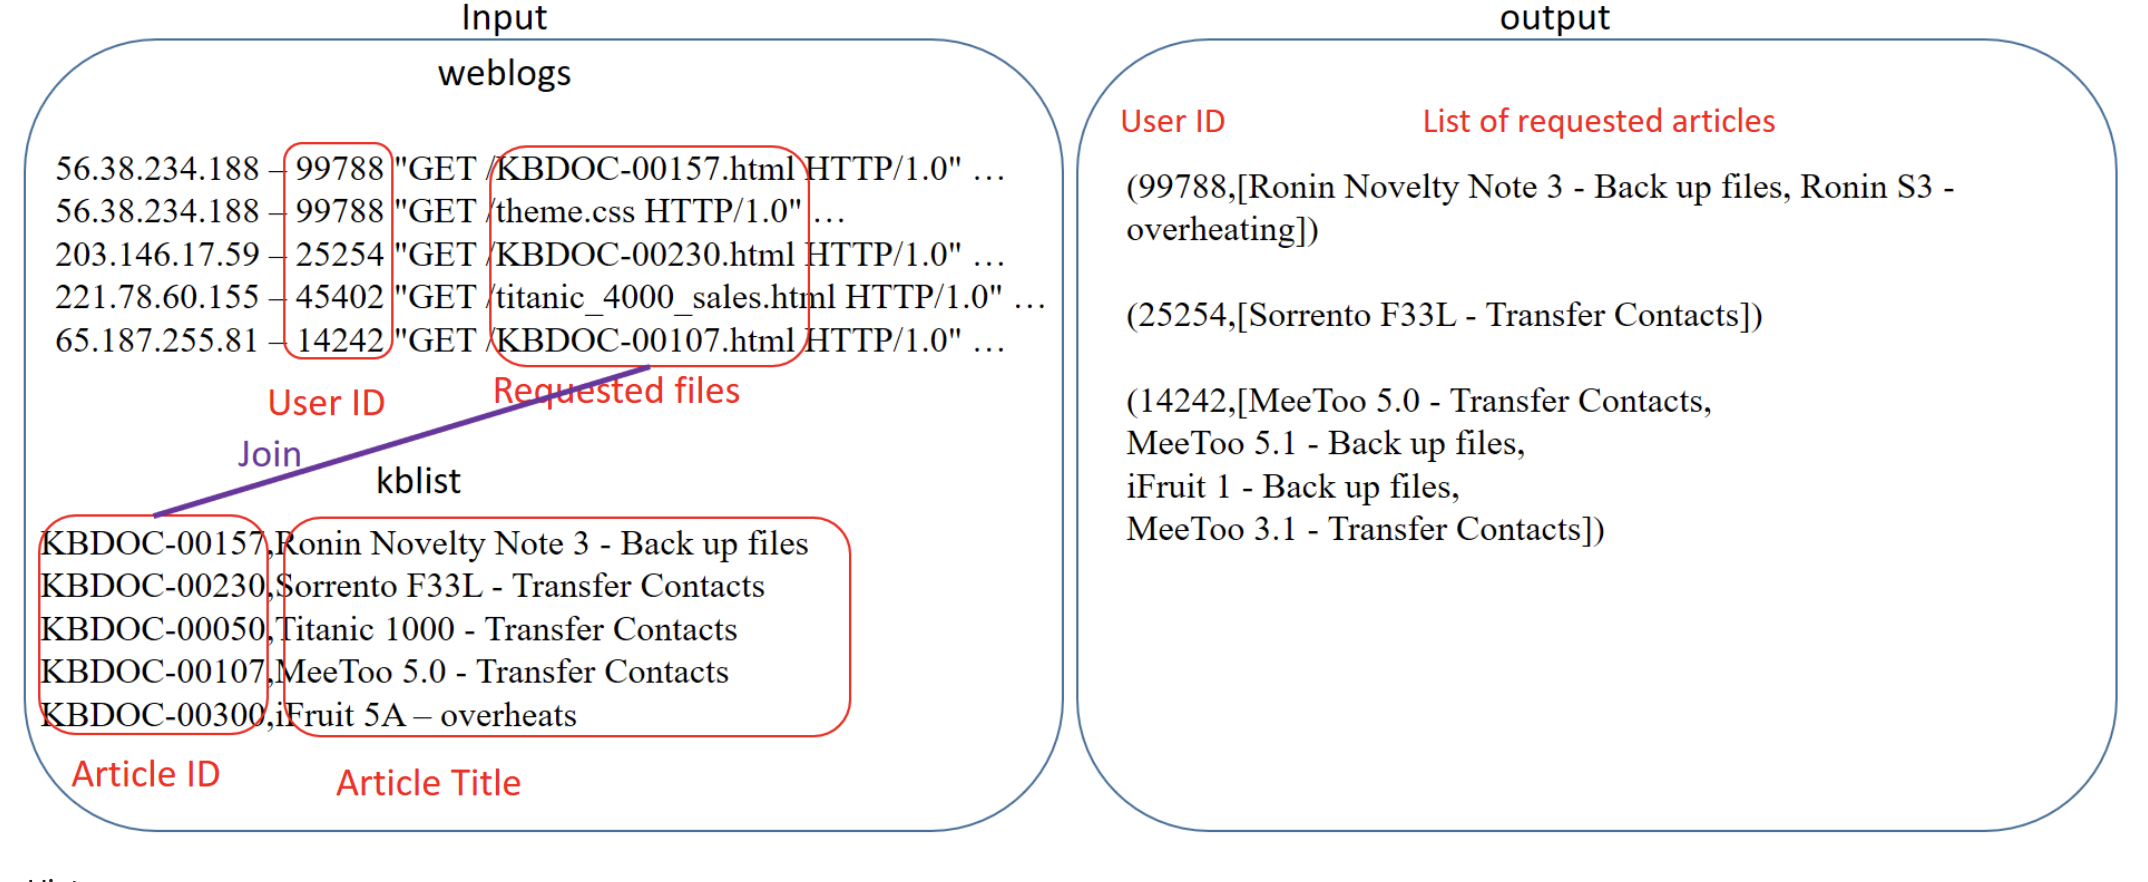

In [16]:
from IPython.display import Image
Image(filename='BonusTask.png')

Hints:
<ul>
<li> Map separate datasets into key‐value Pair RDDs </li>
    <ul>
        <li> Map web log requests to (docid,userid) </li>
        <li> Map KB Doc index to (docid,title)</li>
    </ul>
<li> Join by key: docid</li>
<li> Map joined data into the desired format: (userid,title)</li>
</ul>

# Expected delieverables

 - Nmae each .py file with the task_taskNumber
 - put all .py files and the notebook in a folder and compress it then submit it on canvas